# Data Exploration & Viz

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.utils import resample

In [2]:
df = pd.read_csv("conversion_data_train.csv")
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
5,US,29,0,Seo,7,0
6,US,30,1,Direct,4,0
7,UK,38,1,Ads,2,0
8,UK,26,1,Seo,4,0
9,UK,31,0,Seo,5,0


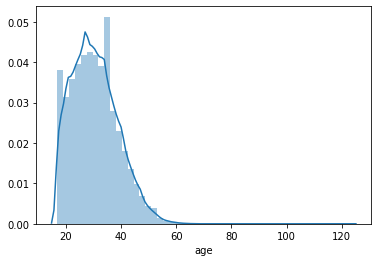

In [3]:
sns.distplot(df.age)

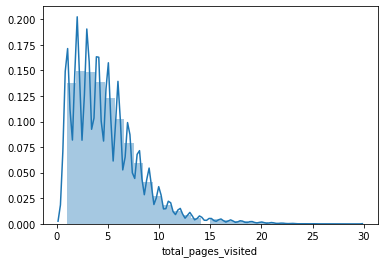

In [4]:
sns.distplot(df.total_pages_visited, bins=30)

In [5]:
# sns.lmplot("age", "converted", data=df, logistic=True)

In [6]:
# sns.lmplot("total_pages-visited", "converted", data=df, logistic=True)

In [7]:
# sns.relplot("age", "total_pages_visited", data=df, hue="converted")

# Random Forest

In [8]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable = "converted"

X = df.loc[:,features_list]
y = df.loc[:,target_variable]

print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [9]:
df.shape

(284580, 6)

In [10]:
# Search categorical features and numeric features

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [11]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [12]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 23 1 'Seo' 4]
 ['US' 17 1 'Ads' 4]
 ['US' 23 1 'Ads' 4]
 ['US' 25 0 'Seo' 8]
 ['US' 31 1 'Seo' 5]]
[['US' 24 1 'Seo' 6]
 ['US' 26 1 'Seo' 7]]

[0, 0, 0, 0, 0]
[0, 0]


# Encoding & Normalizing

In [13]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])
print()
print(X_test[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OneHotEncoder
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)        
        ]
    )

X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_train[0:5,:])
print(X_test[0:5])

Encoding categorical features and standardizing numerical features...

[['China' 23 1 'Seo' 4]
 ['US' 17 1 'Ads' 4]
 ['US' 23 1 'Ads' 4]
 ['US' 25 0 'Seo' 8]
 ['US' 31 1 'Seo' 5]]

[['US' 24 1 'Seo' 6]
 ['US' 26 1 'Seo' 7]
 ['US' 30 0 'Ads' 6]
 ['US' 40 0 'Seo' 11]
 ['US' 20 1 'Seo' 4]]
...Done
[[-0.91337554  0.67637354 -0.26170153  0.          0.          0.
   0.          1.        ]
 [-1.63819843  0.67637354 -0.26170153  0.          0.          1.
   0.          0.        ]
 [-0.91337554  0.67637354 -0.26170153  0.          0.          1.
   0.          0.        ]
 [-0.67176792 -1.47847297  0.93440895  0.          0.          1.
   0.          1.        ]
 [ 0.05305497  0.67637354  0.03732609  0.          0.          1.
   0.          1.        ]]
[[-0.79257173  0.67637354  0.33635371  0.          0.          1.
   0.          1.        ]
 [-0.5509641   0.67637354  0.63538133  0.          0.          1.
   0.          1.        ]
 [-0.06774885 -1.47847297  0.33635371  0.          0

In [14]:
print('Encoding labels.....')
print(y_train[0:5])
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
print('....Done')
print(y_train[0:5])

Encoding labels.....
[0, 0, 0, 0, 0]
....Done
[0 0 0 0 0]


# Training model

In [95]:
# Train model
print("Train model...")
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

classifier.fit(X_train, y_train)
print("...Done.")

Train model...
building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
[

In [96]:
# Predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

print('Train score : ', classifier.score(X_train, y_train), '\n')
print('Test score : ', classifier.score(X_test, y_test), '\n')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
Train score :  0.9871014594607257 

Test score :  0.9860285332771102 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [97]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))

f1-score on train set :  0.778715537336227
f1-score on test set :  0.7594385285575992


In [98]:
# print classification report
print("Classification Report on Test set:\n\n", classification_report(y_test, y_test_pred))

Classification Report on Test set:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     68850
           1       0.85      0.68      0.76      2295

    accuracy                           0.99     71145
   macro avg       0.92      0.84      0.88     71145
weighted avg       0.99      0.99      0.99     71145



In [99]:
# print classification report
print("Classification Report on Train set:\n\n", classification_report(y_train, y_train_pred))

Classification Report on Train set:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99    206550
           1       0.87      0.70      0.78      6885

    accuracy                           0.99    213435
   macro avg       0.93      0.85      0.89    213435
weighted avg       0.99      0.99      0.99    213435



# Under Sampling data

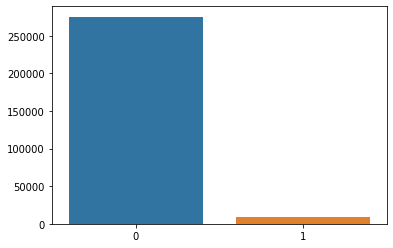

In [20]:
sns.barplot(x=df.converted.value_counts().index, y=df.converted.value_counts().values, data=df)

In [21]:
df.converted.value_counts()

0    275400
1      9180
Name: converted, dtype: int64

In [55]:
# separate the minority and majority classes
df_majority = df[df['converted']==0]
df_minority = df[df['converted']==1]

In [56]:
# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=30000, random_state=0)

In [57]:
# combine majority class with oversampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

In [58]:
df_undersampled.converted.value_counts()

0    30000
1     9180
Name: converted, dtype: int64

In [59]:
# Separate target variable Y from features X
print("Separating labels from features...")

X_under = df_undersampled.loc[:,features_list]
y_under = df_undersampled.loc[:,target_variable]

print("...Done.")
print()

print('y : ')
print(y_under.head())
print()
print('X :')
print(X_under.head())

Separating labels from features...
...Done.

y : 
2      1
12     1
42     1
127    1
200    1
Name: converted, dtype: int64

X :
     country  age  new_user source  total_pages_visited
2    Germany   20         0    Seo                   14
12   Germany   27         1    Ads                   14
42        UK   27         0    Seo                   16
127       US   32         1    Seo                   19
200       US   41         0    Seo                   20


In [60]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.25, 
                                                    random_state=42, stratify=y_under)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [61]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train_u = X_train_u.values
X_test_u = X_test_u.values
y_train_u = y_train_u.tolist()
y_test_u = y_test_u.tolist()
print("...Done")

print(X_train_u[0:5,:])
print(X_test_u[0:2,:])
print()
print(y_train_u[0:5])
print(y_test_u[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 30 0 'Seo' 8]
 ['US' 38 1 'Direct' 3]
 ['China' 32 1 'Ads' 3]
 ['US' 33 0 'Seo' 14]
 ['US' 32 1 'Direct' 4]]
[['US' 26 0 'Seo' 17]
 ['China' 23 0 'Ads' 6]]

[0, 0, 0, 1, 0]
[1, 0]


# Encoding & Norm

In [62]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train_u[0:5,:])
print()
print(X_test_u[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OneHotEncoder
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)        
        ]
    )

X_train_u = featureencoder.fit_transform(X_train_u)
X_test_u = featureencoder.transform(X_test_u)
print("...Done")
print(X_train_u[0:5,:])
print(X_test_u[0:5])

Encoding categorical features and standardizing numerical features...

[['UK' 30 0 'Seo' 8]
 ['US' 38 1 'Direct' 3]
 ['China' 32 1 'Ads' 3]
 ['US' 33 0 'Seo' 14]
 ['US' 32 1 'Direct' 4]]

[['US' 26 0 'Seo' 17]
 ['China' 23 0 'Ads' 6]
 ['US' 30 0 'Seo' 2]
 ['US' 34 0 'Seo' 8]
 ['US' 42 1 'Seo' 1]]
...Done
[[ 0.03558878 -1.23241966  0.21140512  0.          1.          0.
   0.          1.        ]
 [ 1.01078528  0.81141192 -0.73666574  0.          0.          1.
   1.          0.        ]
 [ 0.27938791  0.81141192 -0.73666574  0.          0.          0.
   0.          0.        ]
 [ 0.40128747 -1.23241966  1.34909016  0.          0.          1.
   0.          1.        ]
 [ 0.27938791  0.81141192 -0.54705157  0.          0.          1.
   1.          0.        ]]
[[-0.45200947 -1.23241966  1.91793267  0.          0.          1.
   0.          1.        ]
 [-0.81770816 -1.23241966 -0.16782322  0.          0.          0.
   0.          0.        ]
 [ 0.03558878 -1.23241966 -0.92627991  0. 

In [63]:
print('Encoding labels.....')
print(y_train_u[0:5])
labelencoder = LabelEncoder()
y_train_u = labelencoder.fit_transform(y_train_u)
print('....Done')
print(y_train_u[0:5])

Encoding labels.....
[0, 0, 0, 1, 0]
....Done
[0 0 0 1 0]


In [68]:
from sklearn.linear_model import LogisticRegression

In [78]:
# Train model
print("Train model...")
classifier_u = LogisticRegression()
params = {
    'C': np.arange(-10, 10, 1),
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'n_jobs': [-1],
    'verbose': [2]
}

grid_clf = GridSearchCV(classifier_u, params, cv=10, n_jobs=-1, verbose=2)
grid_clf.fit(X_train_u, y_train_u)
print("...Done.")

Train model...
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1967 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 2221 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.8min
[LibLinear]...Done.
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.7min finished


In [80]:
grid_clf.best_params_

{'C': 2, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 2}

In [79]:
classifier_u = grid_clf.best_estimator_

In [81]:
# Predictions
y_train_pred_u = classifier_u.predict(X_train_u)
y_test_pred_u = classifier_u.predict(X_test_u)

print('Train score : ', classifier_u.score(X_train_u, y_train_u), '\n')
print('Test score : ', classifier_u.score(X_test_u, y_test_u), '\n')

Train score :  0.9526288922919857 

Test score :  0.9492598264420623 



In [82]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train_u, y_train_pred_u))
print("f1-score on test set : ", f1_score(y_test_u, y_test_pred_u))

f1-score on train set :  0.8970261873058145
f1-score on test set :  0.8896291361314679


# Training on complete dataset

In [83]:
# Train model
print("Train model...")
classifier_u.fit(X_train, y_train)
print("...Done.")

Train model...
[LibLinear]...Done.


In [84]:
# Predictions
y_train_pred_u_all = classifier_u.predict(X_train)
y_test_pred_u_all = classifier_u.predict(X_test)

print('Train score : ', classifier_u.score(X_train, y_train), '\n')
print('Test score : ', classifier_u.score(X_test, y_test), '\n')

Train score :  0.9862440555672687 

Test score :  0.9861972028954951 



In [85]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(y_train, y_train_pred_u_all))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_u_all))

f1-score on train set :  0.763873250764034
f1-score on test set :  0.7619970916141542


In [86]:
# print classification report
print("Classification Report on Train set:\n\n", classification_report(y_train, y_train_pred_u_all))

Classification Report on Train set:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99    206550
           1       0.86      0.69      0.76      6885

    accuracy                           0.99    213435
   macro avg       0.92      0.84      0.88    213435
weighted avg       0.99      0.99      0.99    213435



In [87]:
# print classification report
print("Classification Report on Train set:\n\n", classification_report(y_test, y_test_pred_u_all))

Classification Report on Train set:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     68850
           1       0.86      0.68      0.76      2295

    accuracy                           0.99     71145
   macro avg       0.92      0.84      0.88     71145
weighted avg       0.99      0.99      0.99     71145



# Predictions for challenge - traing on all dataset

In [89]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test)

classifier_u.fit(X,y)

[LibLinear]

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

(213435,)

In [92]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = data_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [93]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.20821034 -1.23241966  1.7283185   0.          1.          0.
   0.          1.        ]
 [-0.93960772  0.81141192 -0.35743739  0.          1.          0.
   1.          0.        ]
 [ 0.27938791  0.81141192 -1.11589408  0.          0.          0.
   0.          1.        ]
 [ 0.27938791  0.81141192 -0.16782322  0.          0.          1.
   0.          0.        ]
 [-0.57390903 -1.23241966 -0.73666574  0.          0.          0.
   0.          1.        ]]


In [100]:
# Make predictions and dump to file

data = {
    'converted': classifier.predict(X_without_labels)
}

y_predictions = pd.DataFrame(columns=['converted'],data=data)
y_predictions.to_csv('conversion_data_test_predictions_LORENZO-Model2.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
